# Report

## Q1. Build a Table of Contents (Tree)

In [1]:
from book_analysis.toc import Section

The structure of the table of contents we implemented takes inspiration from Case A of the "Design Options" whereby the entire table is linked under a root `Section` node to create a general tree structure. Hence, subsequent nodes and leaves are also `Section` objects. These objects all have the following two required parameters:

- `title` (string): The title of the section stored at each node
- `children` (list of `Section` objects): A list of children nodes. If the current section is a leaf, this will be an empty list.

To best illustrate how the `Section` class works, we can begin with a simple example. Begin by first initializing the root node. In the context of a book, the title we'd give this node would correspond to the book title.

In [2]:
# Initialize the root node
toc = Section(title="Example Book", children=[])

## Insert sections (`insert`)

Let's say that our book, "Example Book", has the following structure:

```plaintext
Example ToC
- Part I: The first part
    - Chapter 1: The first chapter of part 1
    - Chapter 2: The second chapter of part 1
        - Section 1: The first section of chapter 2
- Part II: The second part
    - Chapter 1: The first chapter of part 2
        - Section 1: The first section of chapter 1
```

Then, to construct this, we can simply use the `insert` method. This method takes two required parameters: `path` (list of integers) and `title` (string).

In [3]:
help(toc.insert)

Help on method insert in module book_analysis.toc:

insert(path: 'list[int]', title: 'str') method of book_analysis.toc.Section instance
    Insert a section within the table of contents.

    Parameters
    ----------
    path: list[int]
        Path within a tree to insert a section
    title: str
        Title of the section to be inserted



In [4]:
toc.insert(path=[1], title="The first part")
toc.insert(path=[1, 1], title="The first chapter of part 1")
toc.insert(path=[1, 2], title="The second chapter of part 1")
toc.insert(path=[1, 2, 1], title="The first section of chapter 2")
toc.insert(path=[2], title="The second part")
toc.insert(path=[2, 1], title="The first chapter of part 2")
toc.insert(path=[2, 1, 1], title="The first section of chapter 1")

Note how the path is constructed hierarchically such that the order of the indices within the list matters. In this case,
```xml
[ <part_index>, <chapter_index>, <section_index> ]
```
This also means the order in which the `insert` method is called is very important. If we were to say insert the last line (at path `[2, 1, 1]`) before the second to last line (at path `[2, 1]`), we would trigger a ValueError saying it is an invalid path. This is because the Part II -> Chapter 1 node has not been created yet.

## View tree metrics (`height` and `depth`)

In class, we studied two metrics that can be used for analyzing a tree data structure: height and depth. As such, we have implemented two methods under the same name (`height` and `depth`, respectively).

The depth of a node is defined to be the number of links from the root node it takes to reach the node itself. Accordingly, height is just the maximum node depth. Therefore, for our example, we should expect the height to be 3 and the depth of say "The first chapter of part 2" to be 2:

In [5]:
toc.height()

3

In [6]:
toc.depth(title="The first chapter of part 2")

2

## Display the table of contents (`print`)

So now that we've created a table of contents as a `Section` object, how can we view it? We have a two options. First, we can simply take a look at each node's children individually by calling the `children` attribute directly:

In [7]:
toc.children[0].children

[(1.1) The first chapter of part 1, (1.2) The second chapter of part 1]

But perhaps more formally, we may call the `print` method to view how our *entire* table of contents looks like in plaintext. Nested within this method is the `preorder_traversal` function which walks through the table of contents tree using the preorder traversal method. The reason for using preorder is because we are accessing the tree in a top-down orderly manner.

There are also three different modes we may use to customize the printed text:
- `"plain"`: Just plain titles
- `"indented"`: Titles with indentations for nested sections
- `"indented+numbered"`: Numbered titles with indentations for nested sections

In [8]:
toc.print(mode="plain")

Example Book
The first part
The first chapter of part 1
The second chapter of part 1
The first section of chapter 2
The second part
The first chapter of part 2
The first section of chapter 1


In [9]:
toc.print(mode="indented")

Example Book
	The first part
		The first chapter of part 1
		The second chapter of part 1
			The first section of chapter 2
	The second part
		The first chapter of part 2
			The first section of chapter 1


In [10]:
toc.print(mode="indented+numbered")

 Example Book
	1 The first part
		1.1 The first chapter of part 1
		1.2 The second chapter of part 1
			1.2.1 The first section of chapter 2
	2 The second part
		2.1 The first chapter of part 2
			2.1.1 The first section of chapter 1


## Constructing a table of contents from a file (`read_toc`)

We have also implemented the `read_toc` function that takes in the title data from a file and constructs a `Section` object dynamically. It is important to note that the `read_toc` function uses a helper `parse_title` function that is specifically tailored to our chosen book. Future iterations of this tool should take into account different table of contents styles.

In [11]:
from book_analysis import read_toc

help(read_toc)

Help on function read_toc in module book_analysis.toc:

read_toc(path: 'str', title: 'str' = '', top_level: 'bool' = True) -> 'Section'
    Read in a TXT file containing table of contents data into a Section object.

    Parameters
    ----------
    path: str
        Path to TXT file
    title: str
        Title of the book
    top_level: bool
        Determines if the highest level should be parsed

    Returns
    -------
    Section object



In [12]:
ai_book = read_toc(
    path="data/artificial_intelligence_a_modern_approach.txt",
    title="Artificial Intelligence: A Modern Approach",
    top_level=True,
)
ai_book.print()

 Artificial Intelligence: A Modern Approach
	1 Artificial Intelligence
		1.1 Introduction ... 1
			1.1.1 What Is AI? ... 1
				1.1.1.1 Acting humanly: The Turing test approach ... 2
				1.1.1.2 Thinking humanly: The cognitive modeling approach ... 2
				1.1.1.3 Thinking rationally: The ``laws of thought'' approach ... 3
				1.1.1.4 Acting rationally: The rational agent approach ... 3
				1.1.1.5 Beneficial machines ... 4
			1.1.2 The Foundations of Artificial Intelligence ... 5
				1.1.2.1 Philosophy ... 6
				1.1.2.2 Mathematics ... 8
				1.1.2.3 Economics ... 9
				1.1.2.4 Neuroscience ... 11
				1.1.2.5 Psychology ... 12
				1.1.2.6 Computer engineering ... 14
				1.1.2.7 Control theory and cybernetics ... 15
				1.1.2.8 Linguistics ... 16
			1.1.3 The History of Artificial Intelligence ... 17
				1.1.3.1 The inception of artificial intelligence (1943--1956) ... 17
				1.1.3.2 Early enthusiasm, great expectations (1952--1969) ... 18
				1.1.3.3 A dose of reality (1966--1973) ... 21


## Q2. Letters & Words Analysis

In [18]:
from book_analysis import analyze_novel

novel_path = "data/notre_dame_de_paris_hugo.txt"

The function below will perform text preprocessing and will also display plots for unigrams, bigrams and trigrams.

Tokens before preprocessing (split raw): 187,642
Tokens after cleaning & tokenization: 192,544
Stopwords removed: 92,306; tokens after stopword removal: 100,238
Total letters counted: 840,889


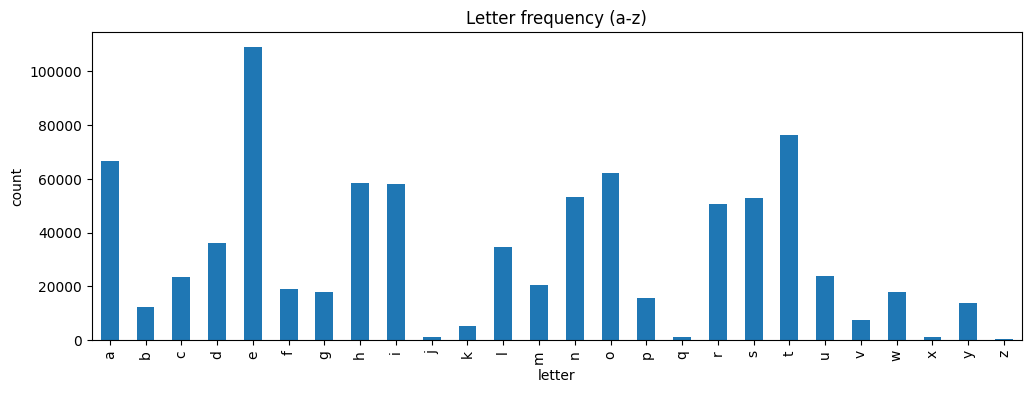

Unique words after stopword removal: 14,838


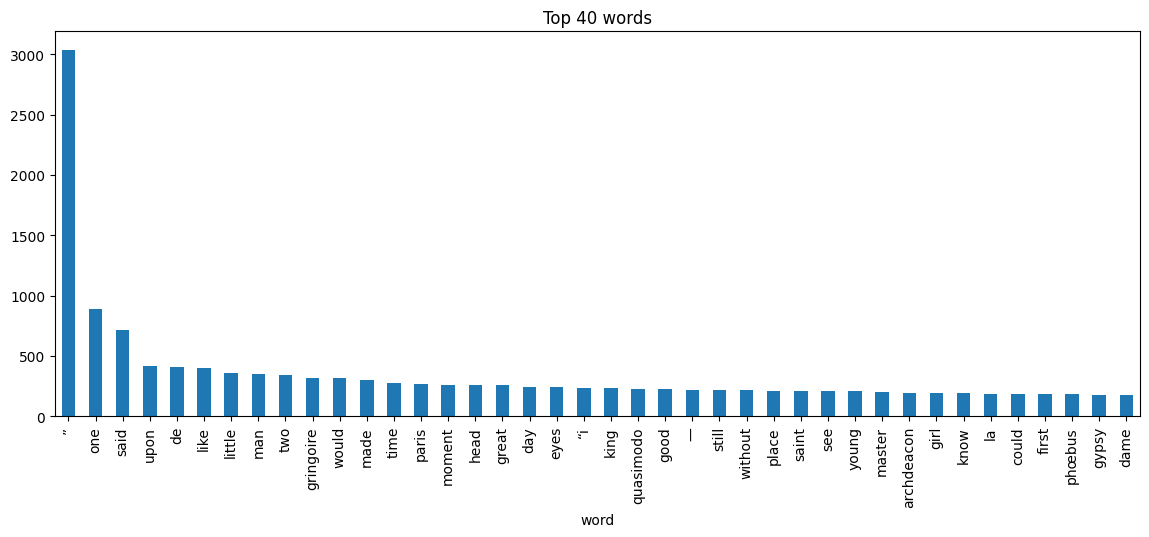

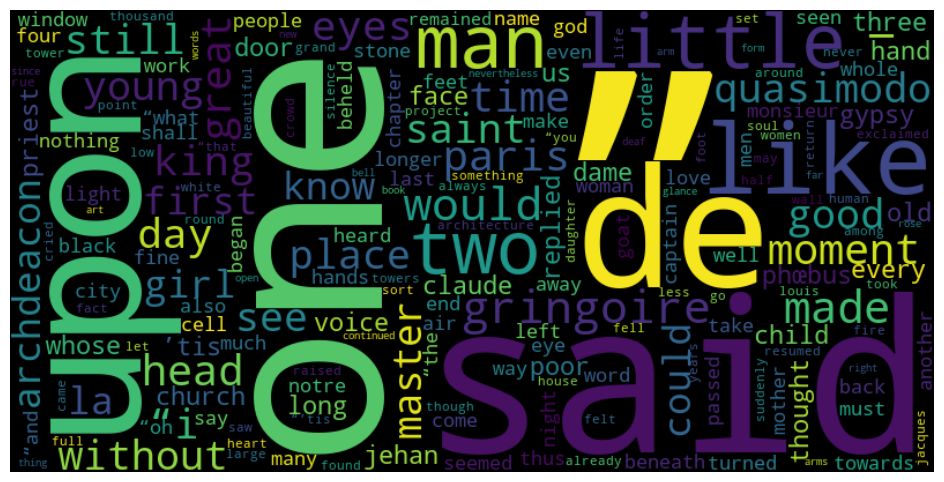

Top Bigrams:
” said -> 539
notre dame -> 141
” replied -> 134
young girl -> 107
” “i -> 79
” exclaimed -> 67
” cried -> 64
” resumed -> 64
fleur de -> 62
dom claude -> 61
louis xi -> 58
de lys -> 56
project gutenberg™ -> 56
said gringoire -> 50
” “and -> 46
la esmeralda -> 46
one would -> 44
de la -> 43
claude frollo -> 42
let us -> 40

Top Trigrams:
fleur de lys -> 56
” said gringoire -> 49
” said king -> 22
place de grève -> 19
one would said -> 19
“oh ” said -> 19
palais de justice -> 18
rue de la -> 18
” said archdeacon -> 18
project gutenberg™ electronic -> 18
phœbus de châteaupers -> 17
” said priest -> 16
dame de paris -> 15
” said jehan -> 15
” “yes ” -> 15
“i know ” -> 14
” “i know -> 14
one would pronounced -> 13
project gutenberg literary -> 13
gutenberg literary archive -> 13


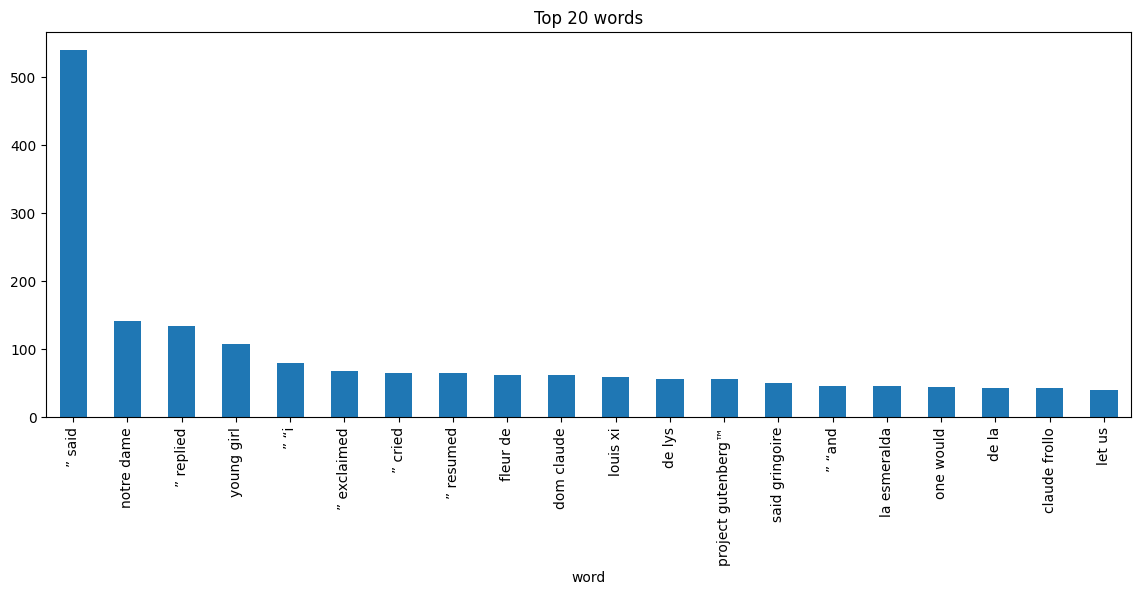

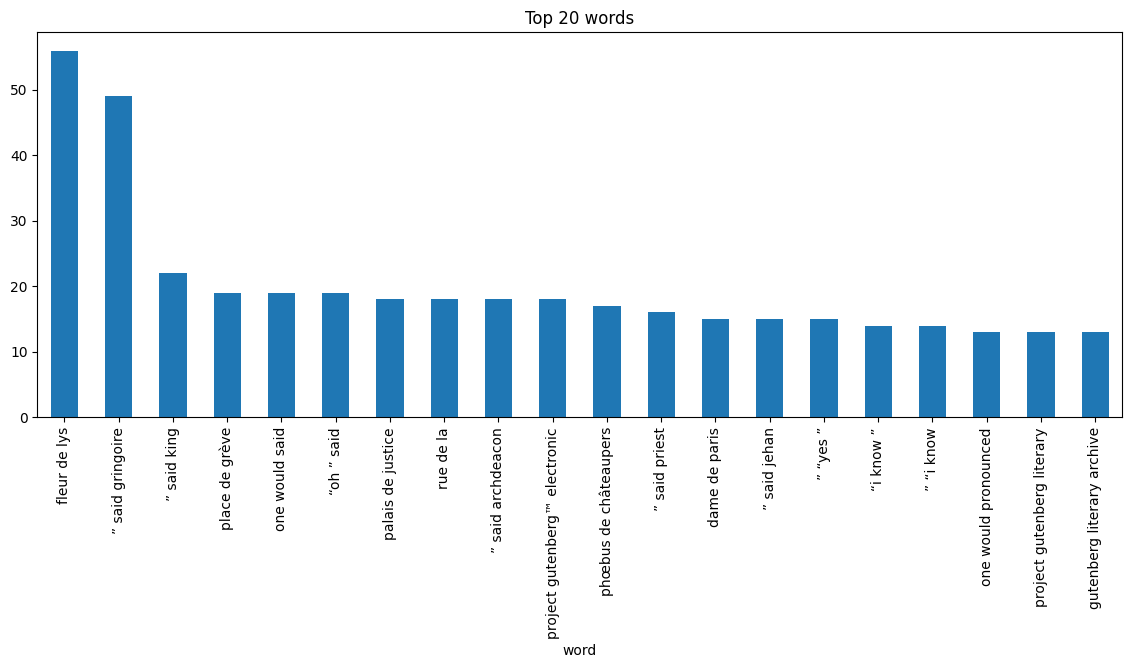

In [15]:
analyzed_novel = analyze_novel(novel_path)

## Challenge

### Sentence-structure metrics: average words per sentence, common sentence starters, sentence length distribution (+ up to 3 bonus pts)

In [16]:
from book_analysis import sentence_metrics
import pandas as pd
import re

1. Read the text of the book from novel_path
2. Split text into chapters using a regex pattern(Example: "CHAPTER I", "CHAPTER II", etc.)
3. The first element is usually the preface or header, so we will skip it
4. Running the sentence_metrics() function on each chapter and storing results
5. Combining results into a DataFrame.
6. Displaying metrics in a nice table format.




In [17]:
with open(novel_path, "r", encoding="utf-8") as f:
    book_text = f.read()

chapters = re.split(r"\bCHAPTER [IVXLCDM]+\b", book_text, flags=re.IGNORECASE)

chapters = [ch.strip() for ch in chapters if len(ch.strip()) > 500]

chapter_results = []
for i, ch in enumerate(chapters, start=1):
    metrics = sentence_metrics(ch)
    metrics["chapter"] = i
    chapter_results.append(metrics)

results_df = pd.DataFrame(chapter_results)

print("\nSentence metrics by chapter:")
display(results_df.head())


Sentence metrics by chapter:


,num_sentences,avg_words_per_sentence,sentence_length_distribution,common_sentence_starters,chapter
0,22,22.272727,"{41: 1, 27: 3, 1: 3, 16: 3, 49: 1, 2: 4, 36: 1...","[(the, 3), (hapgood, 2), (you, 1), (gutenberg,...",1
1,290,18.155172,"{3: 13, 40: 2, 16: 7, 23: 5, 54: 2, 17: 5, 41:...","[(the, 34), (it, 19), (and, 17), (down, 8), (a...",2
2,193,16.890625,"{2: 18, 47: 2, 3: 12, 23: 2, 8: 9, 11: 5, 5: 1...","[(the, 26), (and, 12), (he, 9), (it, 8), (said...",3
3,85,29.258824,"{3: 5, 2: 3, 94: 1, 13: 3, 10: 3, 51: 1, 42: 1...","[(the, 9), (it, 6), (all, 5), (he, 4), (a, 4),...",4
4,174,18.977011,"{3: 9, 57: 1, 17: 6, 14: 8, 6: 9, 9: 1, 7: 6, ...","[(the, 18), (this, 9), (but, 8), (what, 6), (h...",5


We can observe from chapters 2 onwards, our common_sentence_starters are basically stopwords itself.